In [63]:
import numpy as np
import pandas as pd 
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error 
import math
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [64]:




df = pd.read_csv('exams.csv')

In [65]:
df.shape

(1000, 8)

In [66]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [67]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [68]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [69]:
df.skew(numeric_only=True)

math score      -0.151147
reading score   -0.191665
writing score   -0.153621
dtype: float64

In [70]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [71]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute kurtosis
kurtosis_values = numeric_df.kurt()
print(kurtosis_values)


math score      -0.224849
reading score   -0.292524
writing score   -0.348572
dtype: float64


(array([  2.,   9.,  29.,  70., 155., 209., 182., 183., 114.,  47.]),
 array([ 13. ,  21.7,  30.4,  39.1,  47.8,  56.5,  65.2,  73.9,  82.6,
         91.3, 100. ]),
 <BarContainer object of 10 artists>)

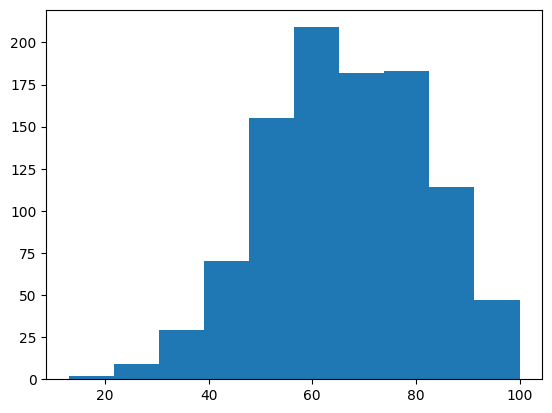

In [72]:
plt.hist(df['math score'])

(array([ 2.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  2.,  3.,  4.,  4.,  4.,
         7., 10., 11., 11., 15., 22., 11., 35., 25., 36., 19., 40., 53.,
        17., 36., 55., 48., 26., 43., 48., 47., 18., 49., 50., 39., 18.,
        27., 35., 31., 12., 18., 18., 12.,  7.,  5.,  6., 17.]),
 array([ 13.  ,  14.74,  16.48,  18.22,  19.96,  21.7 ,  23.44,  25.18,
         26.92,  28.66,  30.4 ,  32.14,  33.88,  35.62,  37.36,  39.1 ,
         40.84,  42.58,  44.32,  46.06,  47.8 ,  49.54,  51.28,  53.02,
         54.76,  56.5 ,  58.24,  59.98,  61.72,  63.46,  65.2 ,  66.94,
         68.68,  70.42,  72.16,  73.9 ,  75.64,  77.38,  79.12,  80.86,
         82.6 ,  84.34,  86.08,  87.82,  89.56,  91.3 ,  93.04,  94.78,
         96.52,  98.26, 100.  ]),
 <BarContainer object of 50 artists>)

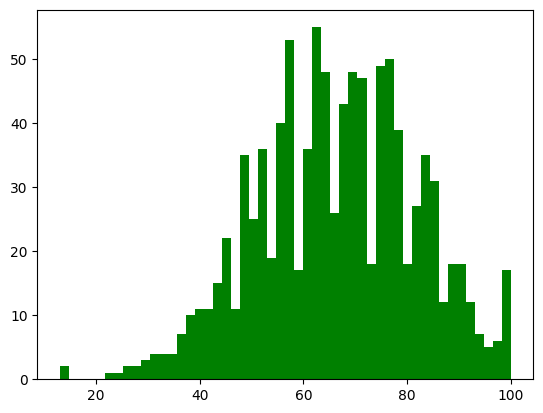

In [73]:
plt.hist(df['math score'],bins=50,color='Green')

C:\Users\ANSH SHARMA\AppData\Local\Temp\ipykernel_7468\2246435904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'],bins=50)


<Axes: xlabel='math score', ylabel='Density'>

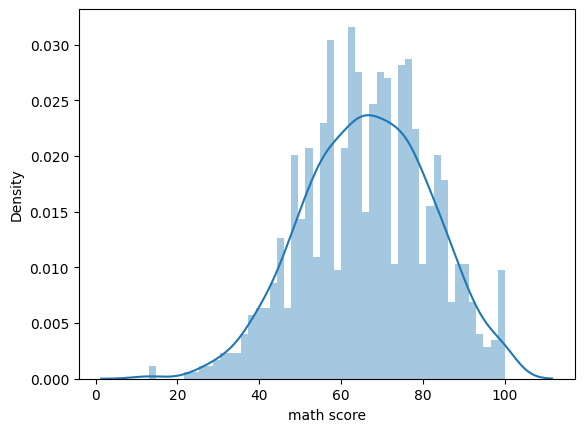

In [74]:
sns.distplot(df['math score'],bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x26505147d40>,
 'caps': [<matplotlib.lines.Line2D at 0x26505178320>,
 'boxes': [<matplotlib.lines.Line2D at 0x26505147b30>],
 'medians': [<matplotlib.lines.Line2D at 0x265051788c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26505178b60>],
 'means': []}

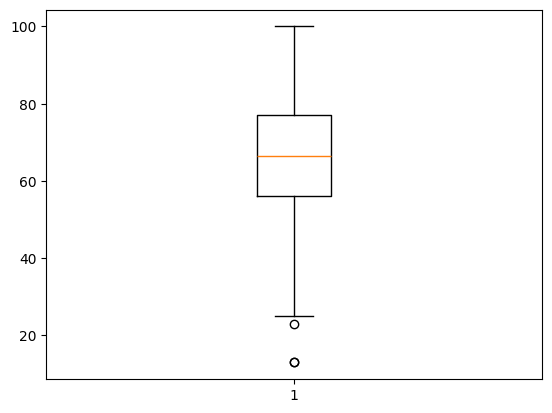

In [75]:
plt.boxplot(df['math score'])

In [76]:
df.corr(numeric_only=True)


,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


<Axes: >

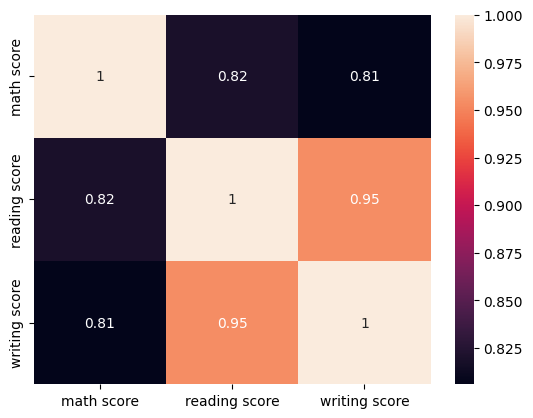

In [77]:
correl=df.corr(numeric_only=True)
sns.heatmap(correl,annot=True)

In [78]:
## model building
x=df.iloc[:,:-1]

In [79]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,male,group A,high school,standard,completed,67,67
1,female,group D,some high school,free/reduced,none,40,59
2,male,group E,some college,free/reduced,none,59,60
3,male,group B,high school,standard,none,77,78
4,male,group E,associate's degree,standard,completed,78,73


In [80]:
y=df.loc[:,'writing score']

In [81]:
y.head()

0    63
1    55
2    50
3    68
4    68
Name: writing score, dtype: int64

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [121]:
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [110]:
lr=LinearRegression()

In [111]:
x_encoded = pd.get_dummies(x, drop_first=True)  # Converts 'gender' into 0/1 columns


lr.fit(x_encoded, y)

LinearRegression()

In [113]:
y_pred=lr.predict(x_encoded)

In [114]:
r2=r2_score(y,y_pred)

In [115]:
mse=mean_squared_error(y,y_pred)

In [116]:
rmse=math.sqrt(mse)

In [117]:
print("Rscore for model is :",r2)

Rscore for model is : 0.9472965782868474


In [118]:
print("rmse for model is :",rmse)

rmse for model is : 3.5797622325660186


In [128]:


input_data = pd.DataFrame(
    [[ 'male', 'group E', "associate's degree", 'standard', 'completed', 78, 73]],
    columns=['gender', 'race', 'parental level of education', 'lunch', 'test preparation course', 'math score','reading score']
)


In [127]:
predicted_writing_score = model_pipeline.predict(input_data)
print(predicted_writing_score)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- race
Feature names seen at fit time, yet now missing:
- race/ethnicity
